In [61]:
#Dakhel Abdulahman
#1621727
#Q2a i

import os
#Numpy is linear algebra lbrary
import numpy as np
# Matplotlib is a visualizations library 
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

#Load libraries
import glob
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import pathlib
import cv2


In [62]:
""""This code is for a machine learning program that is intended to classify images into one of three categories.
The program first imports several libraries that are needed for the program to run, including numpy, matplotlib,
and torch, which is a deep learning framework. The code then defines a transformer object that is used to resize
images, flip them horizontally, convert them to tensors, and normalize them. This transformer is then used to create
trainloader and testloader objects that are used to load the training and test data, respectively.

Next, the code prints the size of the training and test datasets, and then prints the names of the three classes that 
the images belong to. The show_image function is then defined, which takes in an image and displays it. This function
is then used to display a grid of images from the training dataset and print the labels for these images.

The code then defines a myModel class, which extends PyTorch's nn.Module class and represents the model that
will be trained. The __init__ method of this class initializes three linear layers and a ReLU activation function
, and the forward method defines the forward pass of the model. The model is then instantiated and moved to the GPU
(if available) for training.

The code then defines a train_and_valid function that trains the model for a given number of epochs, prints 
the training and validation accuracy and loss after each epoch, and returns the trained model. The test function is
then defined, which takes in a trained model and a test dataset and prints the test accuracy and loss. 
The train_and_valid and test functions are then called, training the model and evaluating its performance on 
the test dataset."""

'"This code is for a machine learning program that is intended to classify images into one of three categories.\nThe program first imports several libraries that are needed for the program to run, including numpy, matplotlib,\nand torch, which is a deep learning framework. The code then defines a transformer object that is used to resize\nimages, flip them horizontally, convert them to tensors, and normalize them. This transformer is then used to create\ntrainloader and testloader objects that are used to load the training and test data, respectively.\n\nNext, the code prints the size of the training and test datasets, and then prints the names of the three classes that \nthe images belong to. The show_image function is then defined, which takes in an image and displays it. This function\nis then used to display a grid of images from the training dataset and print the labels for these images.\n\nThe code then defines a myModel class, which extends PyTorch\'s nn.Module class and represe

In [63]:
# Define a function to convert grayscale images to RGB
def convert_rgb_to_grayscale(input_dir, output_dir):
    # Loop over the files in the input directory
    for filename in os.listdir(input_dir):
        # Load the grayscale image
        gray_image = cv2.imread(os.path.join(input_dir, filename), cv2.IMREAD_GRAYSCALE)
        
        # Save the grayscale image
        cv2.imwrite(os.path.join(output_dir, filename), gray_image)


# Set the input and output directories for the images
input_dir1 = 'test\Covid'
output_dir1 = 'testGray\Covid'
input_dir2 = 'test\imageNormal'
output_dir2 = 'testGray\imageNormal'
input_dir3 = 'test\Pneumonia'
output_dir3 = 'testGray\Pneumonia'

input_dir4 = 'train1\Covid'
output_dir4 = 'trainGray\Covid'
input_dir5 = 'train1\imageNormal'
output_dir5 = 'trainGray\imageNormal'
input_dir6 = 'train1\Pneumonia'
output_dir6 = 'trainGray\Pneumonia'

# Convert the images in each directory
convert_rgb_to_grayscale(input_dir1, output_dir1)
convert_rgb_to_grayscale(input_dir2, output_dir2)
convert_rgb_to_grayscale(input_dir3, output_dir3)
convert_rgb_to_grayscale(input_dir4, output_dir4)
convert_rgb_to_grayscale(input_dir5, output_dir5)
convert_rgb_to_grayscale(input_dir6, output_dir6)


In [64]:
#First I will resize all images to 32 height and width just to be sure that iam using the images of same Size.
#Transforms
transformer =transforms.Compose([
    
    transforms.Resize((32,32)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(), #0-255 to 0-1, numpy to tensors
    transforms.Normalize([0.5, 0.5, 0.5],
                            [0.5,0.5, 0.5]) # 0-1 to [-1,1], formula (x-mean)/std 
                            
])

In [65]:
# Dataloader
#Path for training and testing directory

train_path='trainGray'
test_path='testGray'

trainloader=DataLoader(
    
    torchvision.datasets.ImageFolder(train_path,transform=transformer),
    batch_size=32, shuffle=True
    
)

testloader=DataLoader(
    
    torchvision.datasets.ImageFolder(test_path,transform=transformer),
    batch_size=32, shuffle=True
    
)

#categories
root=pathlib.Path(train_path)
classes=sorted ([j.name.split('/')[-1] for j in root.iterdir()])

print(classes)


train_data_size = len(trainloader.dataset)
test_data_size = len(testloader.dataset)

print(train_data_size)
print(test_data_size)

['Covid', 'Pneumonia', 'imageNormal']
251
66


In [66]:
train_data_size = len(trainloader.dataset)
test_data_size = len(testloader.dataset)

print(train_data_size)
print(test_data_size)

251
66


In [67]:
#categories
root=pathlib.Path(train_path)
classes=sorted ([j.name.split('/')[-1] for j in root.iterdir()])

print(classes)

['Covid', 'Pneumonia', 'imageNormal']


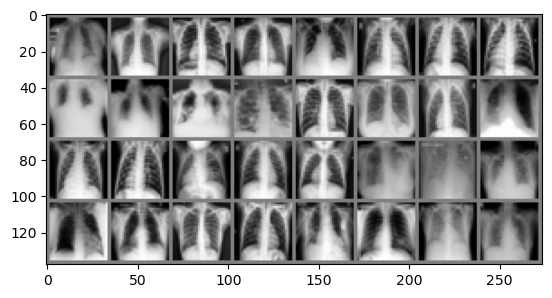

Covid imageNormal imageNormal


In [68]:
def show_image(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
show_image(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(3)))

In [69]:
# ## 1. DEFINE MODEL 
# model = nn.Sequential(nn.Linear(3072, 128),
#                           nn.ReLU(),
#                           nn.Linear(128, 64),
#                           nn.ReLU(),
#                           nn.Linear(64, 3)
#                           )

In [70]:
class myModel(nn.Module): 
    def __init__(self): 
        super(myModel, self).__init__() 
        self.linear1 = nn.Linear(3072, 512) # Input Layer
        self.linear2 = nn.Linear(512, 256)  # First Hidden Layer
        self.linear3 = nn.Linear(256, 128)  # Second Hidden Layer
        self.linear4 = nn.Linear(128, 3)    # Output Layer
        self.relu = nn.ReLU()               # Activation function
  
    def forward(self, x): 
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.linear3(x)
        x = self.relu(x)
        o = self.linear4(x)
        return o 
    
model = myModel()

In [71]:
# 2. LOSS AND OPTIMIZER
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# 3. move the model to GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

myModel(
  (linear1): Linear(in_features=3072, out_features=512, bias=True)
  (linear2): Linear(in_features=512, out_features=256, bias=True)
  (linear3): Linear(in_features=256, out_features=128, bias=True)
  (linear4): Linear(in_features=128, out_features=3, bias=True)
  (relu): ReLU()
)

In [72]:
device

device(type='cpu')

In [73]:
import time # to calculate training time

def train_and_validate(model, loss_criterion, optimizer, epochs=25):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param epochs: Number of epochs (default=25)
  
    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''
    
    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in range(epochs):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))
        
        # Set to training mode
        model.train()
        
        # Loss and Accuracy within the epoch
        train_loss = 0.0
        train_acc = 0.0
        
        valid_loss = 0.0
        valid_acc = 0.0
        
        for i, (inputs, labels) in enumerate(trainloader):

            inputs = inputs.to(device)
            #reshape images so they can be fed to a nn.Linear()
            inputs = inputs.view(inputs.size(0), -1)
            labels = labels.to(device)
            
            # Clean existing gradients
            optimizer.zero_grad()
            
            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)
            
            # Compute loss
            loss = loss_criterion(outputs, labels)
            
            # Backpropagate the gradients
            loss.backward()
            
            # Update the parameters
            optimizer.step()
            
            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)
            
            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))
            
            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))
            
            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)
            
            #print("Batch number: {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}".format(i, loss.item(), acc.item()))

            
        # Validation - No gradient tracking needed
        with torch.no_grad():

            # Set to evaluation mode
            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(testloader):
                inputs = inputs.to(device)
                #reshape images so they can be fed to a nn.Linear()
                inputs = inputs.view(inputs.size(0), -1)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)

                #print("Validation Batch number: {:03d}, Validation: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))
            
        # Find average training loss and training accuracy
        avg_train_loss = train_loss/train_data_size 
        avg_train_acc = train_acc/train_data_size

        # Find average training loss and training accuracy
        avg_test_loss = valid_loss/test_data_size 
        avg_test_acc = valid_acc/test_data_size

        history.append([avg_train_loss, avg_test_loss, avg_train_acc, avg_test_acc])
                
        epoch_end = time.time()
    
        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc*100, avg_test_loss, avg_test_acc*100, epoch_end-epoch_start))
        
        # Save if the model has best accuracy till now
        torch.save(model, 'cifar10_model_'+str(epoch)+'.pt')
            
    return model, history

In [74]:
# 4. Train the model for 10 epochs

num_epochs = 10
trained_model, history = train_and_validate(model, criterion, optimizer, num_epochs)

Epoch: 1/10
Epoch : 000, Training: Loss: 1.0932, Accuracy: 44.2231%, 
		Validation : Loss : 1.0941, Accuracy: 39.3939%, Time: 9.1355s
Epoch: 2/10
Epoch : 001, Training: Loss: 1.0875, Accuracy: 44.2231%, 
		Validation : Loss : 1.0884, Accuracy: 39.3939%, Time: 8.2585s
Epoch: 3/10
Epoch : 002, Training: Loss: 1.0799, Accuracy: 44.2231%, 
		Validation : Loss : 1.0831, Accuracy: 39.3939%, Time: 8.7477s
Epoch: 4/10
Epoch : 003, Training: Loss: 1.0707, Accuracy: 44.2231%, 
		Validation : Loss : 1.0761, Accuracy: 39.3939%, Time: 8.4199s
Epoch: 5/10
Epoch : 004, Training: Loss: 1.0623, Accuracy: 44.6215%, 
		Validation : Loss : 1.0705, Accuracy: 39.3939%, Time: 8.5681s
Epoch: 6/10
Epoch : 005, Training: Loss: 1.0532, Accuracy: 49.4024%, 
		Validation : Loss : 1.0628, Accuracy: 46.9697%, Time: 8.5260s
Epoch: 7/10
Epoch : 006, Training: Loss: 1.0434, Accuracy: 56.9721%, 
		Validation : Loss : 1.0554, Accuracy: 51.5152%, Time: 8.3286s
Epoch: 8/10
Epoch : 007, Training: Loss: 1.0321, Accuracy: 60.

In [75]:
history

[[1.0931509106282693,
  1.094053369579893,
  0.44223107854683563,
  0.3939393939393939],
 [1.0875032370783893,
  1.0884271932370735,
  0.4422310751035394,
  0.3939393939393939],
 [1.0798923408842658,
  1.0830946040875984,
  0.44223107593467986,
  0.3939393939393939],
 [1.0706844933004493,
  1.0761009779843418,
  0.4422310761721486,
  0.3939393939393939],
 [1.0622779819594912,
  1.070532748193452,
  0.44621513896729365,
  0.3939393939393939],
 [1.0531678119028707,
  1.0627644712274724,
  0.49402390545107927,
  0.4696969696969697],
 [1.043447558623386, 1.055353587323969, 0.569721116012786, 0.5151515151515151],
 [1.0320620256591129,
  1.046422495986476,
  0.6055776913802462,
  0.5303030303030303],
 [1.0199636662623797,
  1.0371528033054236,
  0.6414342610484576,
  0.5303030303030303],
 [1.0058232218145848,
  1.024393177393711,
  0.6533864539457982,
  0.5606060606060606]]

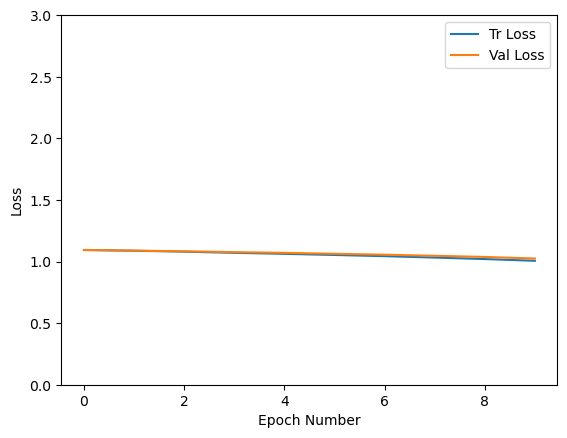

In [76]:
# 5. Analyze the loss curve

history = np.array(history)
plt.plot(history[:,0:2])
plt.legend(['Tr Loss', 'Val Loss'])
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.ylim(0,3)
# plt.savefig('cifar10_loss_curve.png')
plt.show()

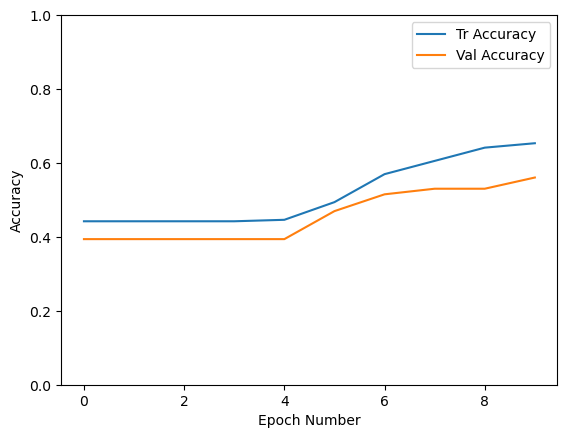

In [77]:
# 6. Analyze the accuracy curve

plt.plot(history[:,2:4])
plt.legend(['Tr Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.ylim(0,1)
# plt.savefig('cifar10_accuracy_curve.png')
plt.show()

In [78]:
images.shape

torch.Size([32, 3, 32, 32])

In [79]:
# again, need to flatten the image
images = images.to(device)
images = images.view(images.size(0), -1)
outputs = model(images)

In [80]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  Covid Covid Covid Covid


In [81]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
#         images, labels = data
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        images = images.view(images.size(0), -1)
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 56 %


In [82]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        images = images.view(images.size(0), -1)
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: Covid is 100.0 %
Accuracy for class: Pneumonia is 50.0 %
Accuracy for class: imageNormal is 5.0 %


<AxesSubplot: >

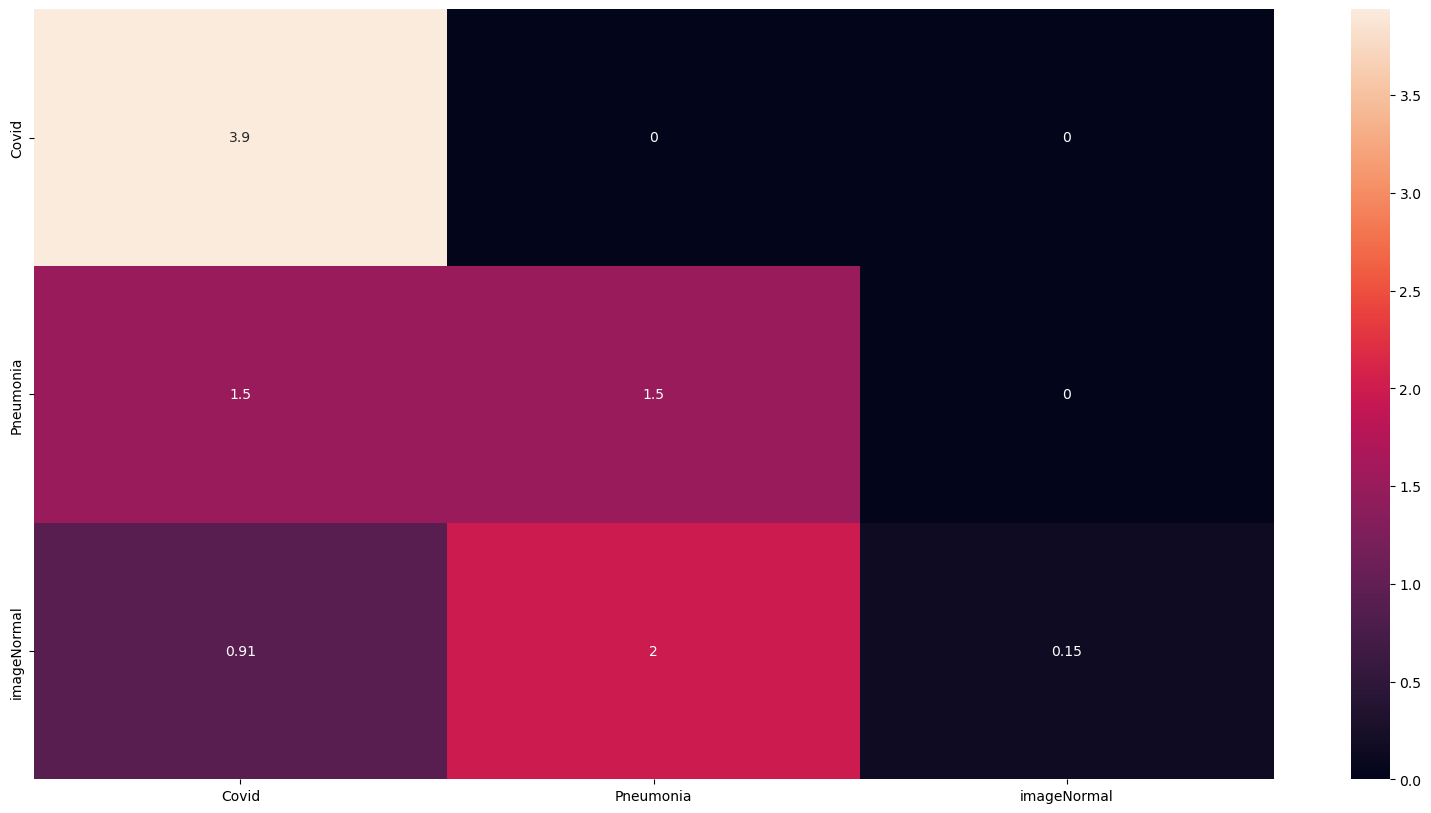

In [83]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []

model.to('cpu')

# iterate over test data
for inputs, labels in testloader:
        #reshape images so they can be fed to a nn.Linear()
        inputs = inputs.view(inputs.size(0), -1)
        output = model(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

# constant for classes

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (20,10))
sn.heatmap(df_cm, annot=True)
# plt.savefig('output.png')